In [ ]:
# to print all lines in the cell
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

import tensorflow as tf
import keras
from keras import layers
from keras import regularizers
from keras import backend as K

from keras.models import Sequential
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint

In [ ]:
url = 'https://raw.githubusercontent.com/uhhiitsphilia/CDS-Project/main/data/raw_data/stem_review_Henry.csv?token=AR3M6JPHPV5G4IK6RFB4RQK7YWOJY'
stem_df = pd.read_csv(url)

In [ ]:
url = 'https://raw.githubusercontent.com/uhhiitsphilia/CDS-Project/main/data/raw_data/lem_review_Henry.csv?token=AR3M6JJK76CGRVZMGNPI5UC7YWOOK'
lem_df = pd.read_csv(url)

In [ ]:
url = 'https://raw.githubusercontent.com/uhhiitsphilia/CDS-Project/main/data/raw_data/none_review_Henry.csv?token=AR3M6JOYASKLQ7ORKPETHZC7YXNT4'
raw_df = pd.read_csv(url)


## Functions for plotting model's 
accuracy history <br>
loss history <br>
best model (prints test accuracy and confusion matrix)


In [ ]:
def plot_acc_history(history1,history2,history3):
    plt.plot(history1.history['accuracy'])
    plt.plot(history1.history['val_accuracy'])

    plt.plot(history2.history['accuracy'])
    plt.plot(history2.history['val_accuracy'])

    plt.plot(history3.history['accuracy'])
    plt.plot(history3.history['val_accuracy'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_stem','test_stem','train_lem','test_lem','train_raw','test_raw'], loc='lower left')
    plt.show()
    return None

In [ ]:
def plot_loss_history(history1,history2,history3):
    plt.plot(history1.history['loss'])
    plt.plot(history1.history['val_loss'])

    plt.plot(history2.history['loss'])
    plt.plot(history2.history['val_loss'])

    plt.plot(history3.history['loss'])
    plt.plot(history3.history['val_loss'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_stem','test_stem','train_lem','test_lem','train_raw','test_raw'], loc='lower right')
    plt.show()
    return None

In [ ]:
def plot_best_model(X_test,y_test,model_no):
    full_model_name = "best_model" + str(model_no) + ".hdf5"
    best_model = keras.models.load_model(full_model_name)
    test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=1) #verbose is to show progress
    print('Model accuracy: ',test_acc)
    print('Predicting...')
    predictions = best_model.predict(X_test, verbose=1)

    #plot confusion_matrix
    matrix = confusion_matrix(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1))
    conf_matrix = pd.DataFrame(matrix, index = ['Negative','Positive'],columns = ['Negative','Positive'])
    #Normalizing
    conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize = (5,5))
    sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})
    return None

## embedding layer for Stemmed tweets

In [ ]:
data_stem_train = np.array(stem_df.iloc[:,0])
data_stem_train

In [ ]:
max_words = 5000 # top x frequent words
max_len = 200 # max len of each review

tokenizer_stem = Tokenizer(num_words=max_words)
tokenizer_stem.fit_on_texts(data_stem_train)
sequences_stem = tokenizer_stem.texts_to_sequences(data_stem_train)
review_stem = pad_sequences(sequences_stem, maxlen=max_len)
review_stem

array([[   0,    0,    0, ...,   11,    7,  219],
       [ 126,    6, 1330, ...,    5,  258, 1073],
       [   0,    0,    0, ...,    6,  189,  436],
       ...,
       [  51,   76,    1, ...,  135,  357,  166],
       [   0,    0,    0, ...,   70,  120,    5],
       [3136,  168,   16, ...,   15,   39, 3278]], dtype=int32)

## embedding layer for Lemmatized tweets

In [ ]:
data_lem_train = np.array(lem_df.iloc[:,0])
data_lem_train

In [ ]:
max_words = 5000 # top x frequent words
max_len = 200 # max len of each doc/tweet

tokenizer_lem = Tokenizer(num_words=max_words)
tokenizer_lem.fit_on_texts(data_lem_train)
sequences_lem = tokenizer_lemma.texts_to_sequences(data_lem_train)
review_lem = pad_sequences(sequences_lem, maxlen=max_len)
review_lem

## embedding layer for none (neither lemmatized nor stemmed) tweets

In [ ]:
data_raw_train = np.array(raw_df.iloc[:,0])
data_raw_train

array(['Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell Highs satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: Im here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isnt!',
       'Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything

In [ ]:
max_words = 5000 # top x frequent words
max_len = 200 # max len of each doc/tweet

tokenizer_raw = Tokenizer(num_words=max_words)
tokenizer_raw.fit_on_texts(data_raw_train)
sequences_raw = tokenizer_raw.texts_to_sequences(data_raw_train)
review_raw = pad_sequences(sequences_raw, maxlen=max_len)
review_raw

array([[   0,    0,    0, ...,   11,    8,  209],
       [4046,    1,   19, ...,    5,  346,  379],
       [   0,    0,    0, ...,    6,  179,  402],
       ...,
       [ 396, 1248, 2618, ...,  124,  336,  158],
       [   0,    0,    0, ...,   61,  178,    5],
       [2062,   18,   82, ...,   14,   39, 1069]], dtype=int32)

## Assigning labels. Positive = 1 and Negative = 0.

In [ ]:
labels = np.array(stem_df['sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'negtive':
        y.append(0)
    if labels[i] == 'postive':
        y.append(1)
y = np.array(y)
labels_all = tf.keras.utils.to_categorical(y, 2, dtype="float32")
del y
len(labels_all)

50000

## Generating train and test data

In [ ]:
stem_train = review_stem[:25000]
stem_test = review_stem[25000:]
print(len(stem_train),len(stem_test))

lem_train = review_lem[:25000]
lem_test = review_lem[25000:]
print(len(lem_train),len(lem_test))

raw_train = review_raw[:25000]
raw_test = review_raw[25000:]
print(len(raw_train),len(raw_test))

labels_train = labels_all[:25000]
labels_test = labels_all[25000:]
print(len(labels_train),len(labels_test))

25000 25000
25000 25000
25000 25000
25000 25000


## Model 00 Simple RNN - stemmed reviews
Model 01 Simple RNN - lemmatized reviews <br>
Model 02 Simple RNN - raw reviews

In [ ]:
model00 = Sequential()
model00.add(layers.Embedding(max_words, 15)) # 15 is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word.
model00.add(layers.SimpleRNN(40)) # 15 here have the same meaning as above
model00.add(layers.Dense(2,activation='softmax'))

model00.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
# Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint00 = ModelCheckpoint("best_model00.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history00 = model00.fit(stem_train, labels_train, epochs=10,validation_data=(stem_test, labels_test),callbacks=[checkpoint00])

In [ ]:
model01 = Sequential()
model01.add(layers.Embedding(max_words, 15)) # 15 is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word.
model01.add(layers.SimpleRNN(40)) # 15 here have the same meaning as above
model01.add(layers.Dense(2,activation='softmax'))

model01.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
# Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint01 = ModelCheckpoint("best_model01.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history01 = model01.fit(lem_train, labels_train, epochs=10,validation_data=(lem_test, labels_test),callbacks=[checkpoint01])

In [ ]:
model02 = Sequential()
model02.add(layers.Embedding(max_words, 15)) # 15 is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word.
model02.add(layers.SimpleRNN(40)) # 15 here have the same meaning as above
model02.add(layers.Dense(2,activation='softmax'))

model02.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
# Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint02 = ModelCheckpoint("best_model02.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history02 = model02.fit(raw_train, labels_train, epochs=10,validation_data=(raw_test, labels_test),callbacks=[checkpoint02])

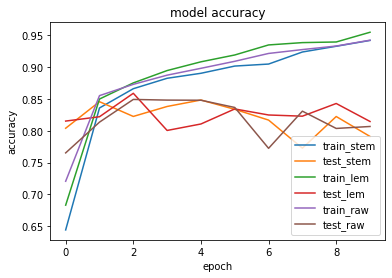

In [ ]:
plot_acc_history(history00,history01,history02)
plot_loss_history(history00,history01,history02)

### verdict: none

In [ ]:
model10 = Sequential()
model10.add(layers.Embedding(max_words, 40))
model10.add(layers.LSTM(15,dropout=0.7))
model10.add(layers.Dense(2,activation='sigmoid'))

model10.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint10 = ModelCheckpoint("best_model10.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history10 = model10.fit(raw_train, labels_train, epochs=20,validation_data=(raw_test, labels_test),callbacks=[checkpoint10])

In [ ]:
model11 = Sequential()
model11.add(layers.Embedding(max_words, 40))
model11.add(layers.LSTM(15,dropout=0.7))
model11.add(layers.Dense(2,activation='softmax'))

model11.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint11 = ModelCheckpoint("best_model11.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history11 = model11.fit(raw_train, labels_train, epochs=20,validation_data=(raw_test, labels_test),callbacks=[checkpoint11])

In [ ]:
model12 = Sequential()
model12.add(layers.Embedding(max_words, 40))
model12.add(layers.LSTM(15,dropout=0.7))
model12.add(layers.Dense(2,activation='sigmoid'))

model12.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy']) #changed from categorical_crossentropy to binary_crossentropy
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint12 = ModelCheckpoint("best_model12.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history12 = model12.fit(raw_train, labels_train, epochs=20,validation_data=(raw_test, labels_test),callbacks=[checkpoint12])

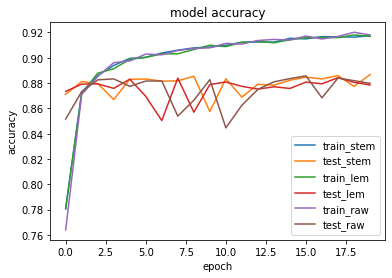

In [ ]:
# sigmoid vs softmax activation for last layer
plot_acc_history(history10,history11,history12)

In [ ]:
model13 = Sequential() # 0.89436
model13.add(layers.Embedding(max_words, 128))
model13.add(layers.LSTM(64,dropout=0.7))
model13.add(layers.Dense(2,activation='sigmoid'))

model13.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy']) 
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint13 = ModelCheckpoint("best_model13.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history13 = model13.fit(raw_train, labels_train, epochs=20,validation_data=(raw_test, labels_test),callbacks=[checkpoint13])

In [ ]:
model14 = Sequential() # 0.89160
model14.add(layers.Embedding(max_words, 128))
model14.add(layers.LSTM(64,dropout=0.7))
model14.add(layers.Dense(15,activation='sigmoid'))
model14.add(layers.Dense(2,activation='sigmoid'))

model14.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy']) 
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint14 = ModelCheckpoint("best_model14.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history14 = model14.fit(raw_train, labels_train, epochs=20,validation_data=(raw_test, labels_test),callbacks=[checkpoint14])

In [ ]:
model15 = Sequential() # 0.89252
model15.add(layers.Embedding(max_words, 128))
model15.add(layers.LSTM(64,dropout=0.7))
model15.add(layers.Dense(40,activation='sigmoid'))
model15.add(layers.Dense(2,activation='sigmoid'))

model15.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy']) 
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint15 = ModelCheckpoint("best_model15.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history15 = model15.fit(raw_train, labels_train, epochs=20,validation_data=(raw_test, labels_test),callbacks=[checkpoint15])

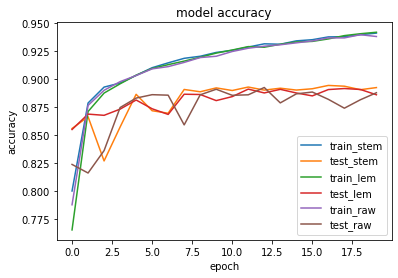

In [ ]:
plot_acc_history(history13,history14,history15)

In [ ]:
model16 = Sequential() # 0.89092
model16.add(layers.Embedding(max_words, 256))
model16.add(layers.LSTM(128,dropout=0.7))
model16.add(layers.Dense(2,activation='sigmoid'))

model16.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy']) 
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint16 = ModelCheckpoint("best_model16.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history16 = model13.fit(raw_train, labels_train, epochs=20,validation_data=(raw_test, labels_test),callbacks=[checkpoint16])

In [ ]:
model17 = Sequential() # 0.88680
model17.add(layers.Embedding(max_words, 1024))
model17.add(layers.LSTM(128,dropout=0.7))
model17.add(layers.Dense(20,activation='sigmoid'))
model17.add(layers.Dense(2,activation='sigmoid'))

model17.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy']) 
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint17 = ModelCheckpoint("best_model17.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history17 = model13.fit(raw_train, labels_train, epochs=20,validation_data=(raw_test, labels_test),callbacks=[checkpoint17])

In [ ]:
model18 = Sequential() # 0.88120
model18.add(layers.Embedding(max_words, 256))
model18.add(layers.LSTM(128,return_sequences=True,dropout=0.7))
model18.add(layers.Bidirectional(layers.LSTM(40,return_sequences=True,dropout=0.7)))
model18.add(layers.Dense(20,activation='sigmoid'))
model18.add(layers.Dense(2,activation='sigmoid'))

model18.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy']) 
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint18 = ModelCheckpoint("best_model18.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history18 = model13.fit(raw_train, labels_train, epochs=20,validation_data=(raw_test, labels_test),callbacks=[checkpoint18])


In [ ]:
model19 = Sequential() # 0.89436
model19.add(layers.Embedding(max_words, 128))
model19.add(layers.GRU(64,dropout=0.7))
model19.add(layers.Dense(2,activation='sigmoid'))

model19.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy']) 
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint19 = ModelCheckpoint("best_model19.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history91 = model13.fit(raw_train, labels_train, epochs=20,validation_data=(raw_test, labels_test),callbacks=[checkpoint19])


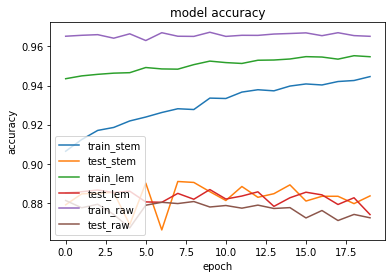

In [ ]:
plot_acc_history(history16,history17,history18)

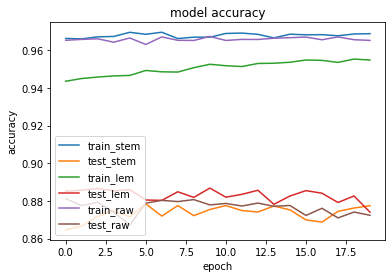

In [ ]:
plot_acc_history(history91,history17,history18)

In [ ]:
model20 = Sequential()
model20.add(layers.Embedding(max_words, 64, input_length=max_len))
model20.add(layers.Bidirectional(layers.LSTM(40,dropout=0.7)))
model20.add(layers.Dense(4,activation='softmax'))
model20.add(layers.Dense(1,activation='softmax'))


model20.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint20 = ModelCheckpoint("best_model20.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history20 = model10.fit(raw_train, labels_train, epochs=20,validation_data=(raw_test, labels_test),callbacks=[checkpoint20])